In [1]:
import h5py
import numpy as np
import argparse as ap
from pathlib import Path
import os
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.9, rc={'text.usetex': True})
sns.set_style('whitegrid')

In [34]:
datasets = ['red_sphere_final', 'blue_sphere_final', 'red_rectangle_final']
titles = ['Same color and shape', 'Different color', 'Different shape']
p_denn_l1 = Path('log/train:red_sphere_repulsive:green_sphere_l:1_b:0.1')
p_denn_l10 = Path('log/train:red_sphere_repulsive:green_sphere_l:10_b:0.1')
p_deep_ensemble = Path('log/new_ensemble_train:red_sphere')

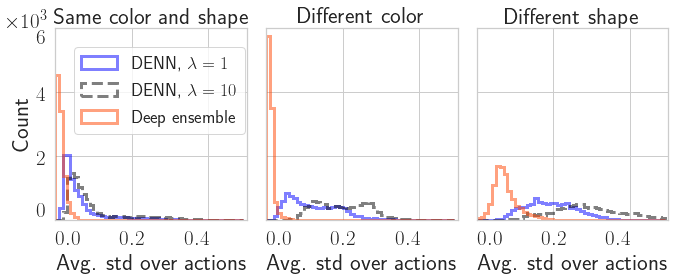

In [86]:
# ===============================================================================
# showing the plots
# ===============================================================================

fig, axes = plt.subplots(1, 3, figsize=(10, 4), squeeze=False, sharey=True)


for i, (dataset, title) in enumerate(zip(datasets, titles)):
    ax = axes[0, i]
    ax.set_ylim([0, 6e3])

    with h5py.File(p_deep_ensemble / '{}.h5'.format(dataset), 'r') as cf:
        baseline_test_std = cf.get('std')[:]

    with h5py.File(p_denn_l1 / '{}.h5'.format(dataset), 'r') as f:
        test_std1 = f.get('std')[:]
    with h5py.File(p_denn_l10 / '{}.h5'.format(dataset), 'r') as f:
        test_std2 = f.get('std')[:]

    # Preparing data for plots
    # --> We take the mean since the differences between the actions do not seem to be significative
    baseline_test = baseline_test_std.mean(1)
    method_test1 = test_std1.mean(1)
    method_test2 = test_std2.mean(1)

    # display ticks
    #ax.set_xticks([0, 0.5])
    plt.setp(ax.get_xticklabels(), visible=True)
    plt.setp(ax.get_xticklabels()[0], ha='left')
    plt.setp(ax.get_xticklabels()[-1], ha='right')
    if i == 0:
        plt.setp(ax.get_yticklabels()[0], va='bottom')
        plt.setp(ax.get_yticklabels()[-1], va='top')


    #bins = np.histogram(np.hstack((test_std[:,0], eval_std[:,0], baseline_test_std[:,0], baseline_eval_std[:,0])), bins=40)[1] # defining the bins
    bins = np.arange(0, 0.5, 0.01) # defining the bins
    # Proposed method
    sns.distplot(method_test1, hist=True, kde=False, bins=bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'log': False, 'linewidth': 3, 'linestyle':('solid'), 'alpha':.5},
                 label=r'DENN, $\lambda=1$', ax=ax, color='blue')

    # Proposed method
    sns.distplot(method_test2, hist=True, kde=False, bins=bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'log': False, 'linewidth': 3, 'linestyle':('dashed'), 'alpha':.5},
                 label=r'DENN, $\lambda=10$', ax=ax, color='black')

    # Baseline method
    sns.distplot(baseline_test, hist=True, kde=False, bins=bins,
                 kde_kws={'shade': True, 'linewidth': 2},
                 hist_kws={"histtype": "step", 'log': False, 'linewidth': 3, 'linestyle':('solid'), 'alpha':.5},
                 label='Deep ensemble', ax=ax, color='orangered')

    
    ax.set_xlabel('Avg. std over actions')
        
    if i == 0:
        ax.set_ylabel('Count')

    else:
        ax.set_ylabel('')
    ax.set_xlim(0.0, 0.5)
    if i == 0:
        ax.legend(loc=(.1, .45), prop={'size':18})
    ax.set_title(title)

plt.tight_layout()
plt.subplots_adjust(wspace = .1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
t = axes[0,0].yaxis.get_offset_text()
t.set_x(-.25)
plt.show()
# figname = 'reacher-predictive-std.pdf'
# pfig = Path('img') / figname
# plt.savefig(pfig)